Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

In [2]:
!pip install pandas scikit-learn matplotlib                                                    

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # Corrected import statement
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('termdeposit_train.csv')

df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
#Cheking first 5 rows of the dataset
df.head()


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
#Cheking last 5 rows of the dataset
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [7]:
# Exploratory Data Analysis (EDA)

In [8]:
#Cheking columns
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [9]:
print("The shape of dataset is :",df.shape)

The shape of dataset is : (31647, 18)


In [10]:
df = df.drop_duplicates()
print(f"Rows & Columns after deleting the duiplicates :",df.shape)

Rows & Columns after deleting the duiplicates : (31647, 18)


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [12]:
#This is our target variable / target features.
df["subscribed"].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [14]:
df1=df.drop('ID',axis=1)

In [15]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [16]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

Number Data Type Columns are: 
 ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [17]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
#There is not any null value present which are well & good.

In [18]:
df['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [19]:
df.describe(include="all").T  #Discribe function we get all type of values


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,31647.0,NaN,NaN,NaN,22563.972162,13075.93699,2.0,11218.0,22519.0,33879.5,45211.0
age,31647.0,NaN,NaN,NaN,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
job,31647,12,blue-collar,6842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,31647,3,married,19095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,31647,4,secondary,16224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,31647,2,no,31062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,31647.0,NaN,NaN,NaN,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
housing,31647,2,yes,17584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,31647,2,no,26516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,31647,3,cellular,20423,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.nunique().to_frame("Unique Values")

,Unique Values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [21]:
#Exploring unique values in each categorical coloumn
for col in categorical_cols:
    print(df[col].value_counts())
    print("="*50)

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64
default
no     31062
yes      585
Name: count, dtype: int64
housing
yes    17584
no     14063
Name: count, dtype: int64
loan
no     26516
yes     5131
Name: count, dtype: int64
contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64
month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64
poutcome
unknown    25929
failure     3362
other       1288
su

In [22]:
# Exploring summary statistics for all numerical columns.
for col in numerical_cols:
    print(col)
    print("Mean:", df[col].mean())
    print("Standard Deviation:", df[col].std())
    print("Minimum:", df[col].min())
    print("25th Percentile:", df[col].quantile(0.25))
    print("Median:", df[col].median())
    print("75th Percentile:", df[col].quantile(0.75))
    print("Maximum:", df[col].max())
    print("="*50)


ID
Mean: 22563.972161658294
Standard Deviation: 13075.936990208973
Minimum: 2
25th Percentile: 11218.0
Median: 22519.0
75th Percentile: 33879.5
Maximum: 45211
age
Mean: 40.957247132429615
Standard Deviation: 10.62513448189384
Minimum: 18
25th Percentile: 33.0
Median: 39.0
75th Percentile: 48.0
Maximum: 95
balance
Mean: 1363.890258160331
Standard Deviation: 3028.304293183632
Minimum: -8019
25th Percentile: 73.0
Median: 450.0
75th Percentile: 1431.0
Maximum: 102127
day
Mean: 15.835466236926091
Standard Deviation: 8.337096720052099
Minimum: 1
25th Percentile: 8.0
Median: 16.0
75th Percentile: 21.0
Maximum: 31
duration
Mean: 258.1135336682782
Standard Deviation: 257.11897294377695
Minimum: 0
25th Percentile: 104.0
Median: 180.0
75th Percentile: 318.5
Maximum: 4918
campaign
Mean: 2.765696590514109
Standard Deviation: 3.113830047732373
Minimum: 1
25th Percentile: 1.0
Median: 2.0
75th Percentile: 3.0
Maximum: 63
pdays
Mean: 39.576041962903275
Standard Deviation: 99.31759240372912
Minimum: -1


In [20]:
# Visualization

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


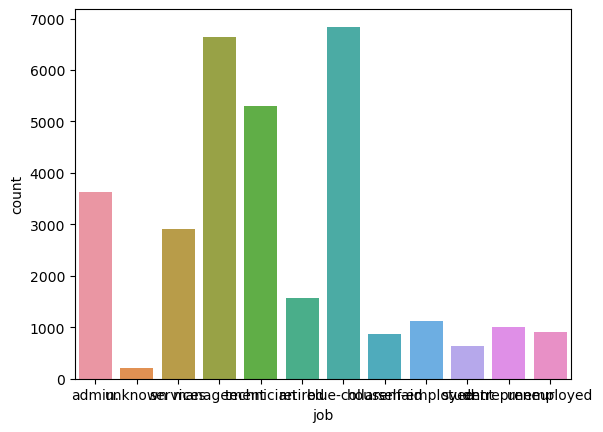

In [23]:
ax = sns.countplot (x='job',data=df[categorical_cols])
print(df['job'].value_counts())

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


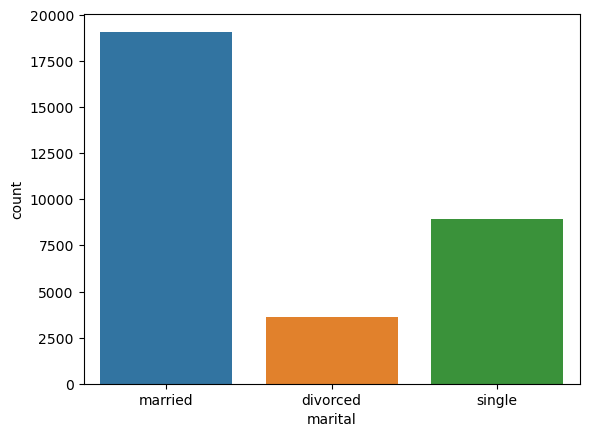

In [24]:
ax = sns.countplot (x='marital',data=df[categorical_cols])
print(df['marital'].value_counts())

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


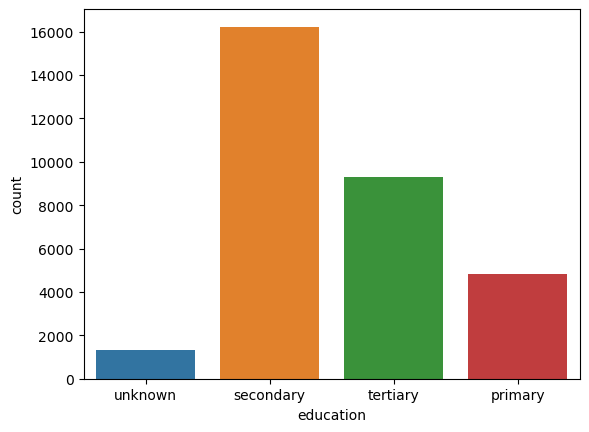

In [25]:
ax = sns.countplot (x='education',data=df[categorical_cols])
print(df['education'].value_counts())

default
no     31062
yes      585
Name: count, dtype: int64


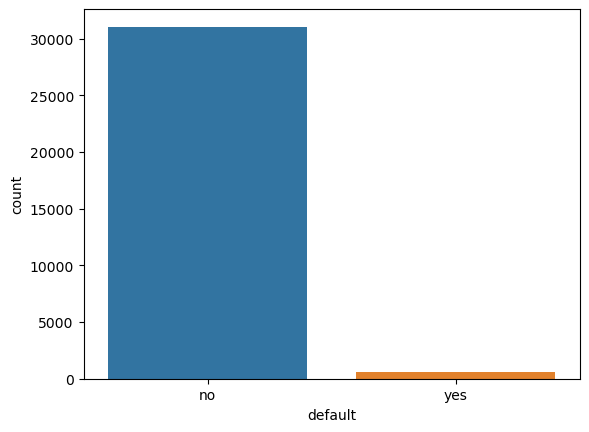

In [26]:
ax = sns.countplot (x='default',data=df[categorical_cols])
print(df['default'].value_counts())

housing
yes    17584
no     14063
Name: count, dtype: int64


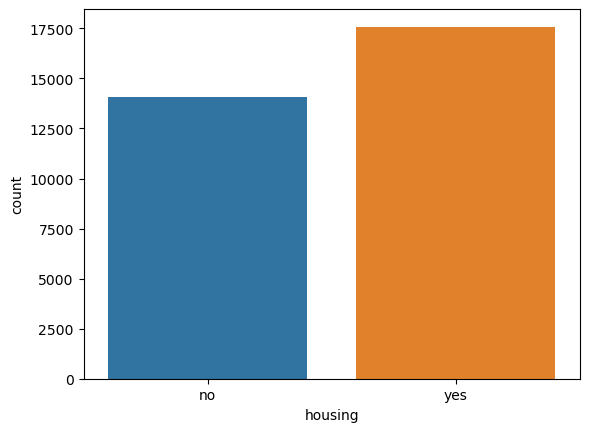

In [27]:
ax = sns.countplot (x='housing',data=df[categorical_cols])
print(df['housing'].value_counts())

loan
no     26516
yes     5131
Name: count, dtype: int64


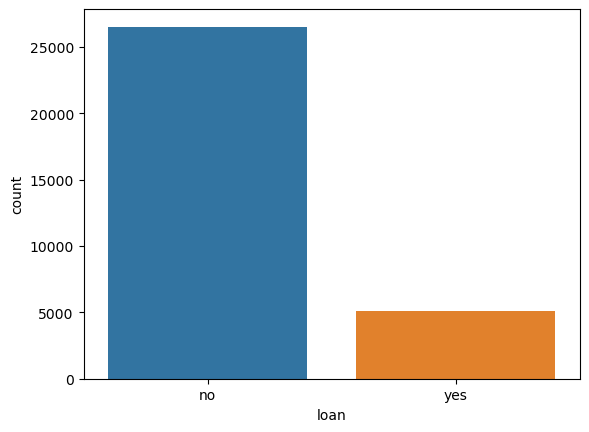

In [28]:
ax = sns.countplot (x='loan',data=df[categorical_cols])
print(df['loan'].value_counts())

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64


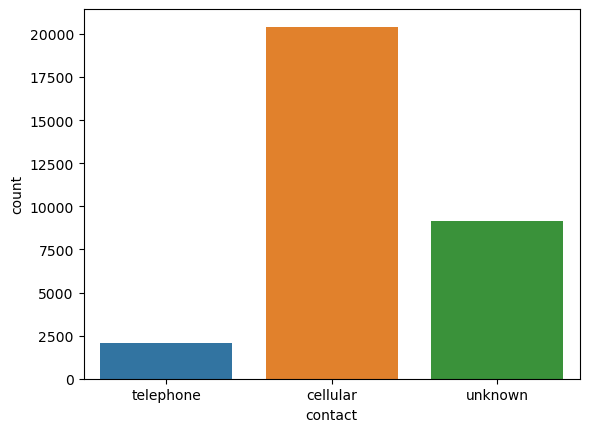

In [29]:
ax = sns.countplot (x='contact',data=df[categorical_cols])
print(df['contact'].value_counts())

month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64


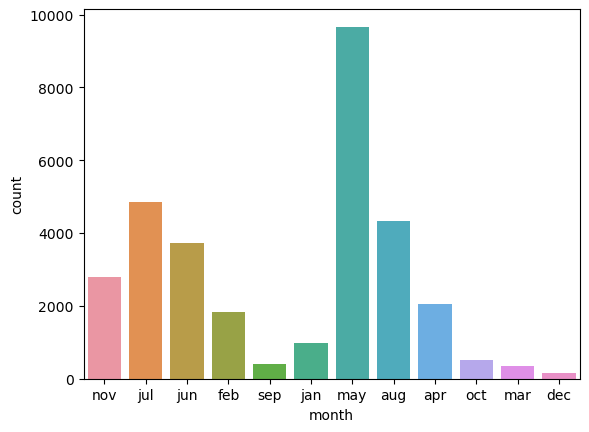

In [30]:
ax = sns.countplot (x='month',data=df[categorical_cols])
print(df['month'].value_counts())

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64


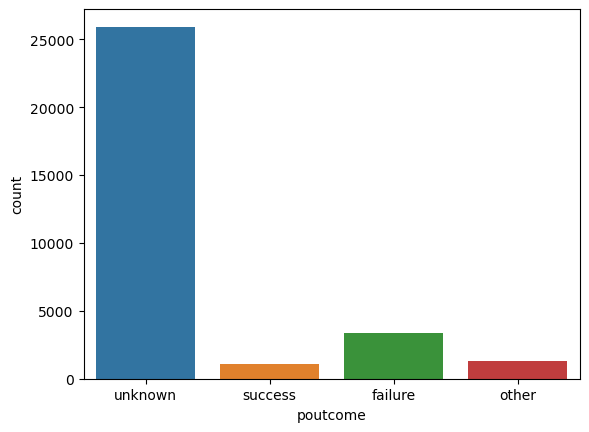

In [31]:
ax = sns.countplot (x='poutcome',data=df[categorical_cols])
print(df['poutcome'].value_counts())

subscribed
no     27932
yes     3715
Name: count, dtype: int64


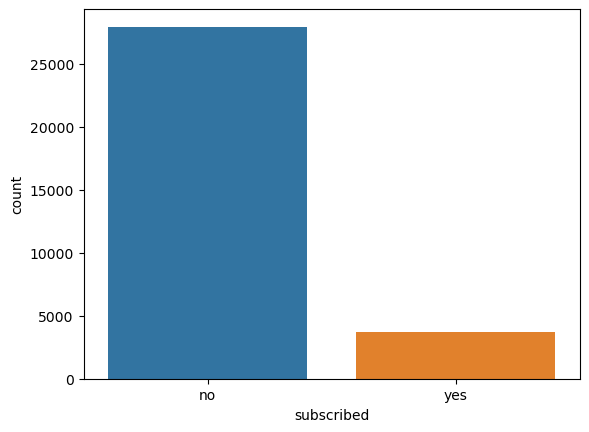

In [32]:
ax = sns.countplot (x='subscribed',data=df[categorical_cols])
print(df['subscribed'].value_counts())

0.6816067818884382


<Axes: xlabel='age', ylabel='Density'>

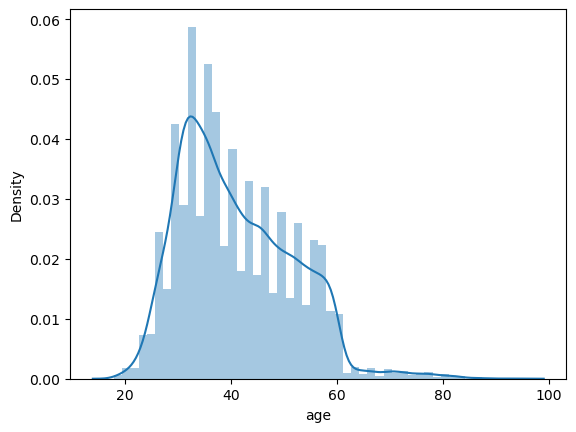

In [33]:
print(df['age'].skew())
sns.distplot(df['age'],kde=True)

7.995695573886313


<Axes: xlabel='balance', ylabel='Density'>

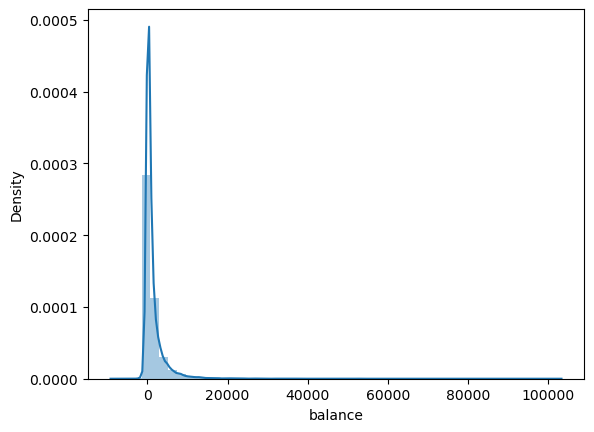

In [34]:
print(df['balance'].skew())
sns.distplot(df['balance'],kde=True)

0.08718543483770899


<Axes: xlabel='day', ylabel='Density'>

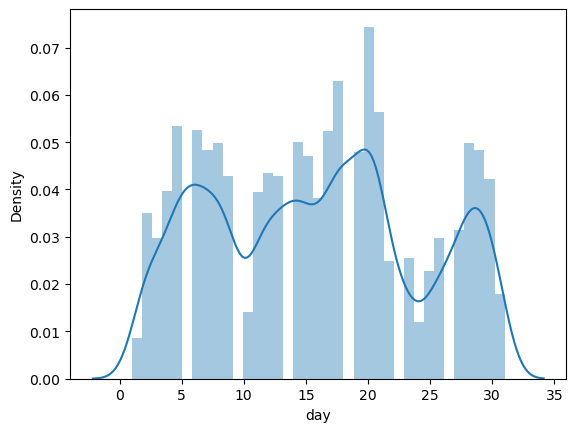

In [35]:
print(df['day'].skew())
sns.distplot(df['day'],kde=True)

3.1997657339236736


<Axes: xlabel='duration', ylabel='Density'>

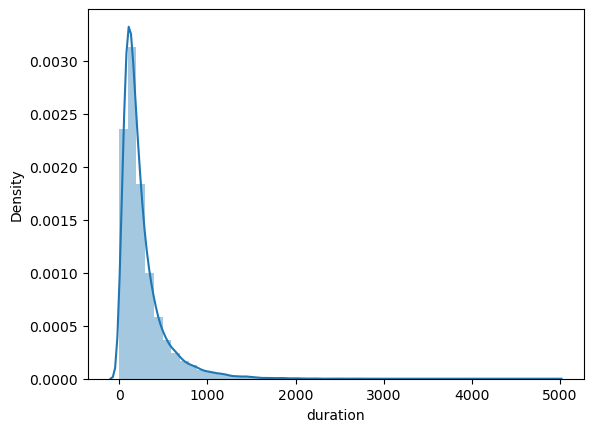

In [36]:
print(df['duration'].skew())
sns.distplot(df['duration'],kde=True)

4.873934933081073


<Axes: xlabel='campaign', ylabel='Density'>

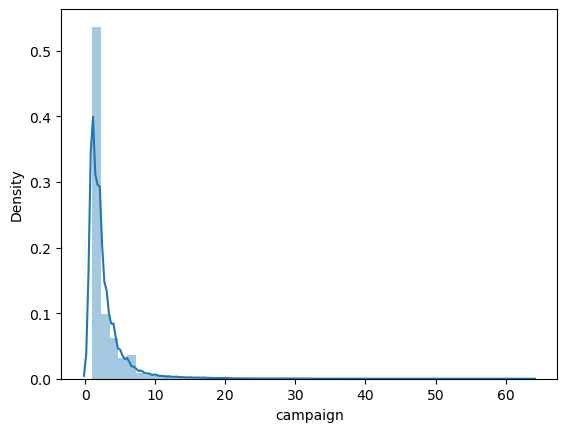

In [37]:
print(df['campaign'].skew())
sns.distplot(df['campaign'],kde=True)

2.642374162969253


<Axes: xlabel='pdays', ylabel='Density'>

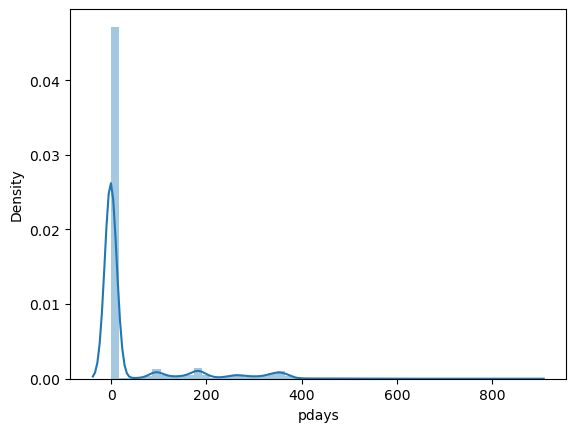

In [38]:
print(df['pdays'].skew())
sns.distplot(df['pdays'],kde=True)

49.30234792386907


<Axes: xlabel='previous', ylabel='Density'>

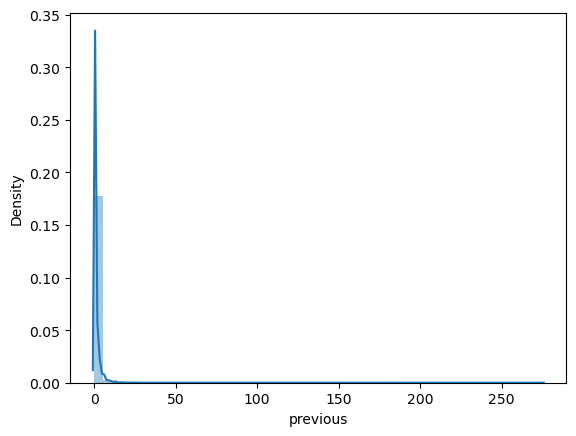

In [39]:
print(df['previous'].skew())
sns.distplot(df['previous'],kde=True)

Skewness found will fix this later in the project

In [50]:
#Exploring the Categorical columns
Categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [ ]:
#Exploring numerical/Continious columns
['ID', 'age','balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<Axes: xlabel='ID', ylabel='age'>

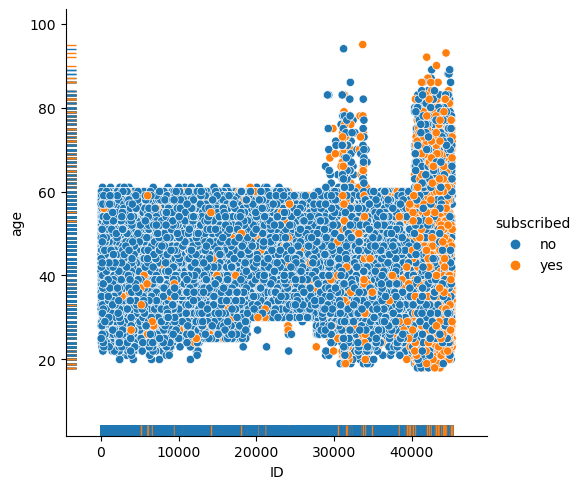

In [40]:
sns.relplot(data=df, x='ID', y='age', hue='subscribed')
sns.rugplot(data=df, x='ID', y='age', hue='subscribed', legend=False)

<Axes: xlabel='ID', ylabel='balance'>

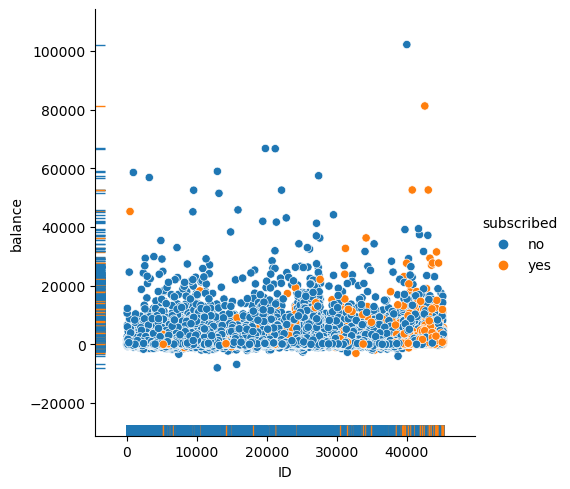

In [41]:
sns.relplot(data=df, x='ID', y='balance', hue='subscribed')
sns.rugplot(data=df, x='ID', y='balance', hue='subscribed', legend=False)

<Axes: xlabel='ID', ylabel='day'>

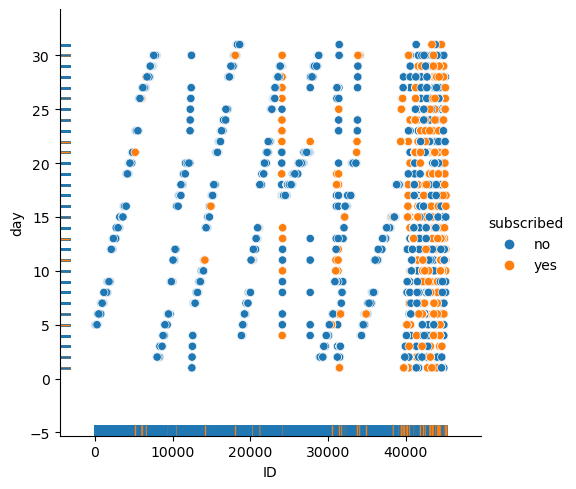

In [42]:
sns.relplot(data=df, x='ID', y='day', hue='subscribed')
sns.rugplot(data=df, x='ID', y='day', hue='subscribed', legend=False)

<Axes: xlabel='ID', ylabel='duration'>

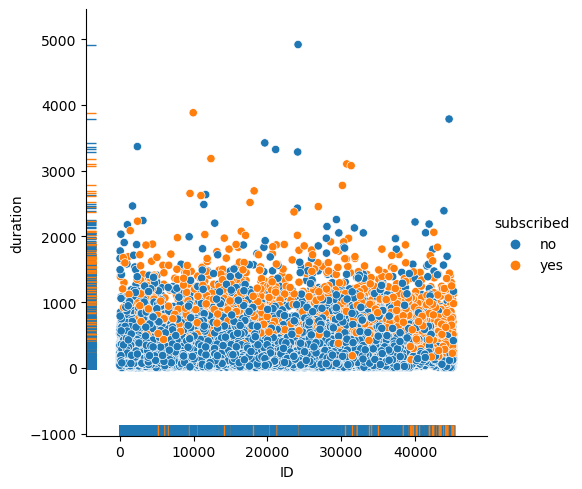

In [43]:
sns.relplot(data=df, x='ID', y='duration', hue='subscribed')
sns.rugplot(data=df, x='ID', y='duration', hue='subscribed', legend=False)

In [44]:
'campaign', 'pdays', 'previous']

SyntaxError: unmatched ']' (667740897.py, line 1)

<Axes: xlabel='ID', ylabel='campaign'>

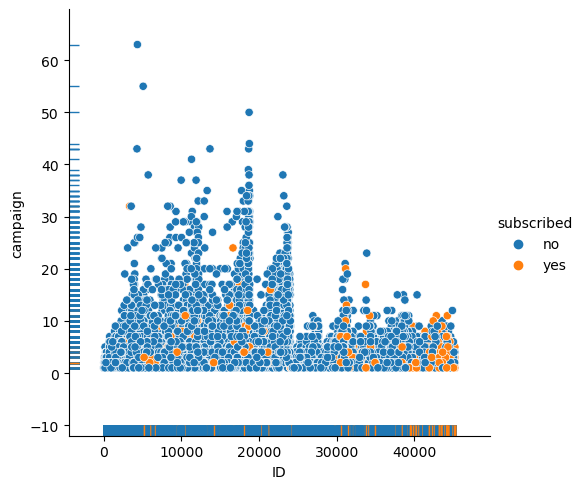

In [45]:
sns.relplot(data=df, x='ID', y='campaign', hue='subscribed')
sns.rugplot(data=df, x='ID', y='campaign', hue='subscribed', legend=False)

<Axes: xlabel='ID', ylabel='pdays'>

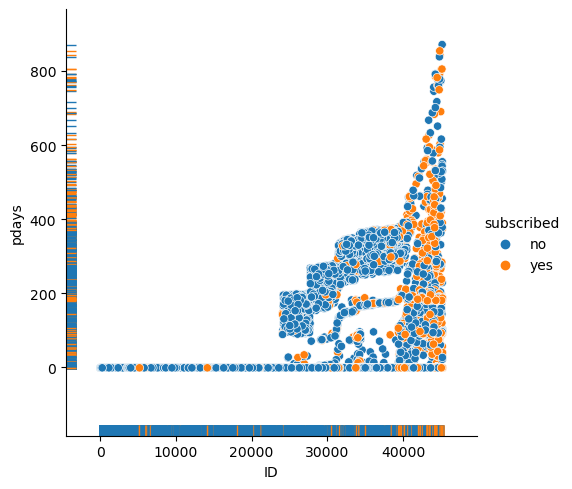

In [46]:
sns.relplot(data=df, x='ID', y='pdays', hue='subscribed')
sns.rugplot(data=df, x='ID', y='pdays', hue='subscribed', legend=False)

<Axes: xlabel='ID', ylabel='previous'>

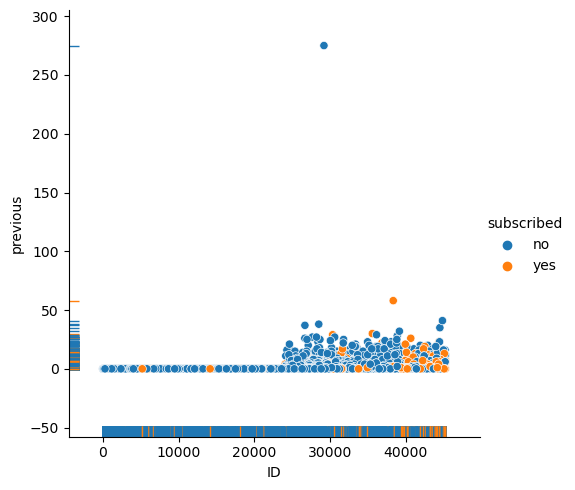

In [46]:
sns.relplot(data=df, x='ID', y='previous', hue='subscribed')
sns.rugplot(data=df, x='ID', y='previous', hue='subscribed', legend=False)

In [47]:
df=df.drop('ID',axis=1)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [80]:
categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

# Encoading the Categorical object datatype columns 

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in Categorical_columns:
    if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
        df[col] = le.fit_transform(df[col])

df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         31647 non-null  int64
 1   job         31647 non-null  int32
 2   marital     31647 non-null  int32
 3   education   31647 non-null  int32
 4   default     31647 non-null  int32
 5   balance     31647 non-null  int64
 6   housing     31647 non-null  int32
 7   loan        31647 non-null  int32
 8   contact     31647 non-null  int32
 9   day         31647 non-null  int64
 10  month       31647 non-null  int32
 11  duration    31647 non-null  int64
 12  campaign    31647 non-null  int64
 13  pdays       31647 non-null  int64
 14  previous    31647 non-null  int64
 15  poutcome    31647 non-null  int32
 16  subscribed  31647 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 2.9 MB


Sucessfully Converted Object Datatype into int datatype
Cheking for non values after applying transformation technique

In [54]:
numerical_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']

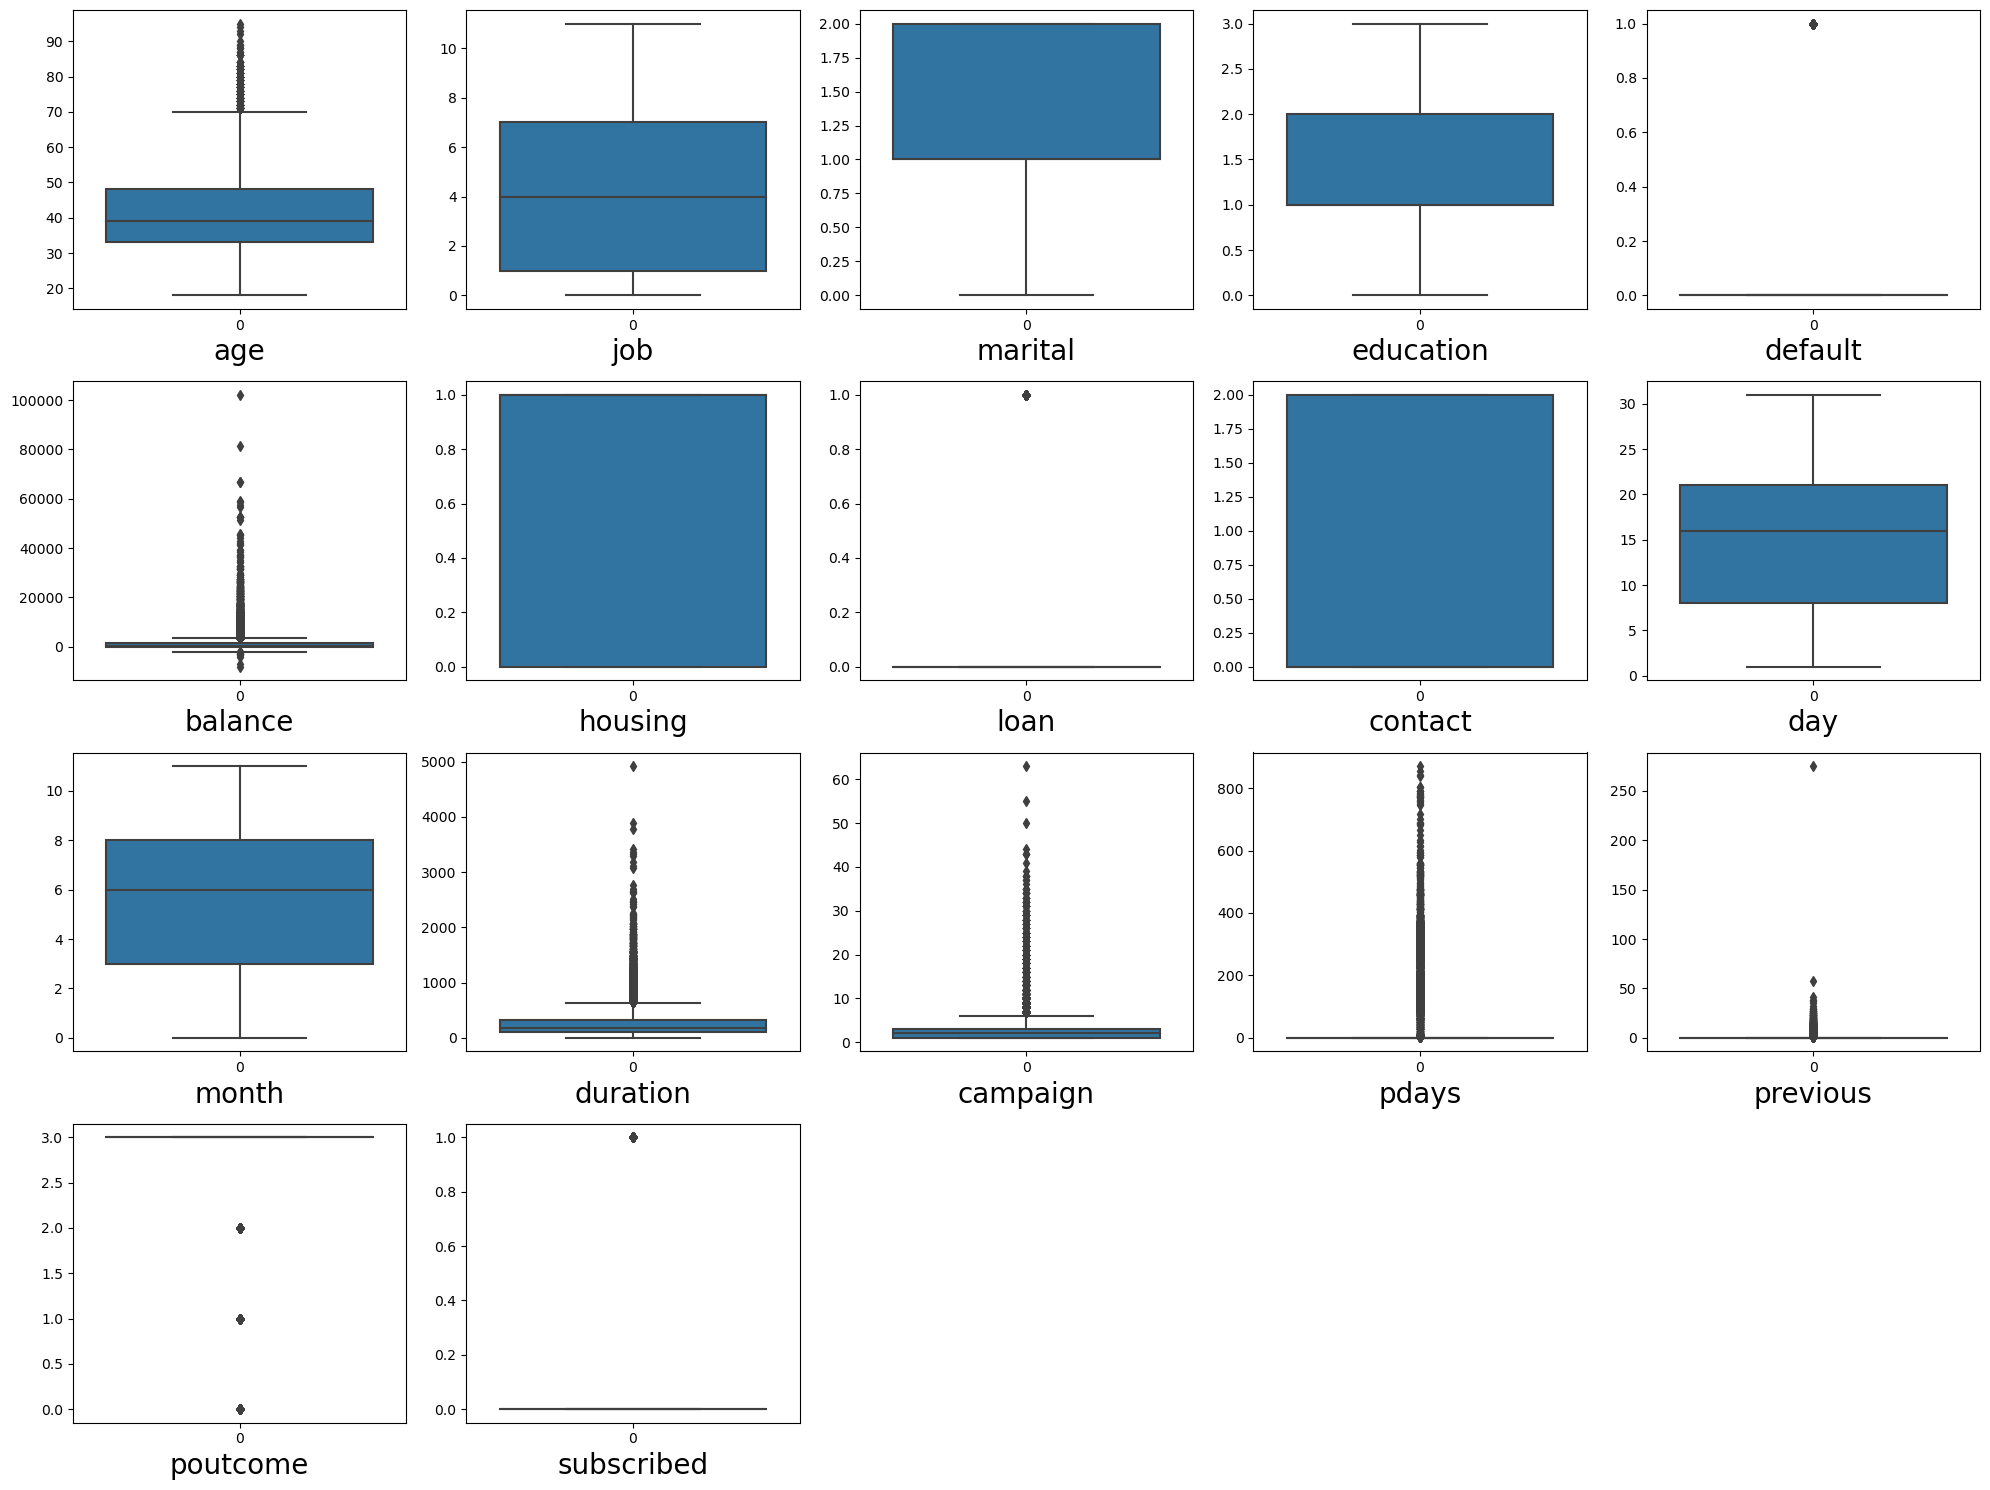

In [55]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number = 1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
    
plt.tight_layout()

With the usage of box plot we tried  to check for outliers in our continous data columns and we found no outliers in them  

In [ ]:
positive_skew_col = [age,]

In [57]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

With the skew method we see that there are column present in our data set that are above the aceptable range of +/-0.5 value however most of those are Categorical columns and do not worry about outliers or skewness in catagorical data therefore we will ignore having said that the skewness that is present 
In our continous data columns in catagorical column we wont have to fix any other concern in our dataset. 

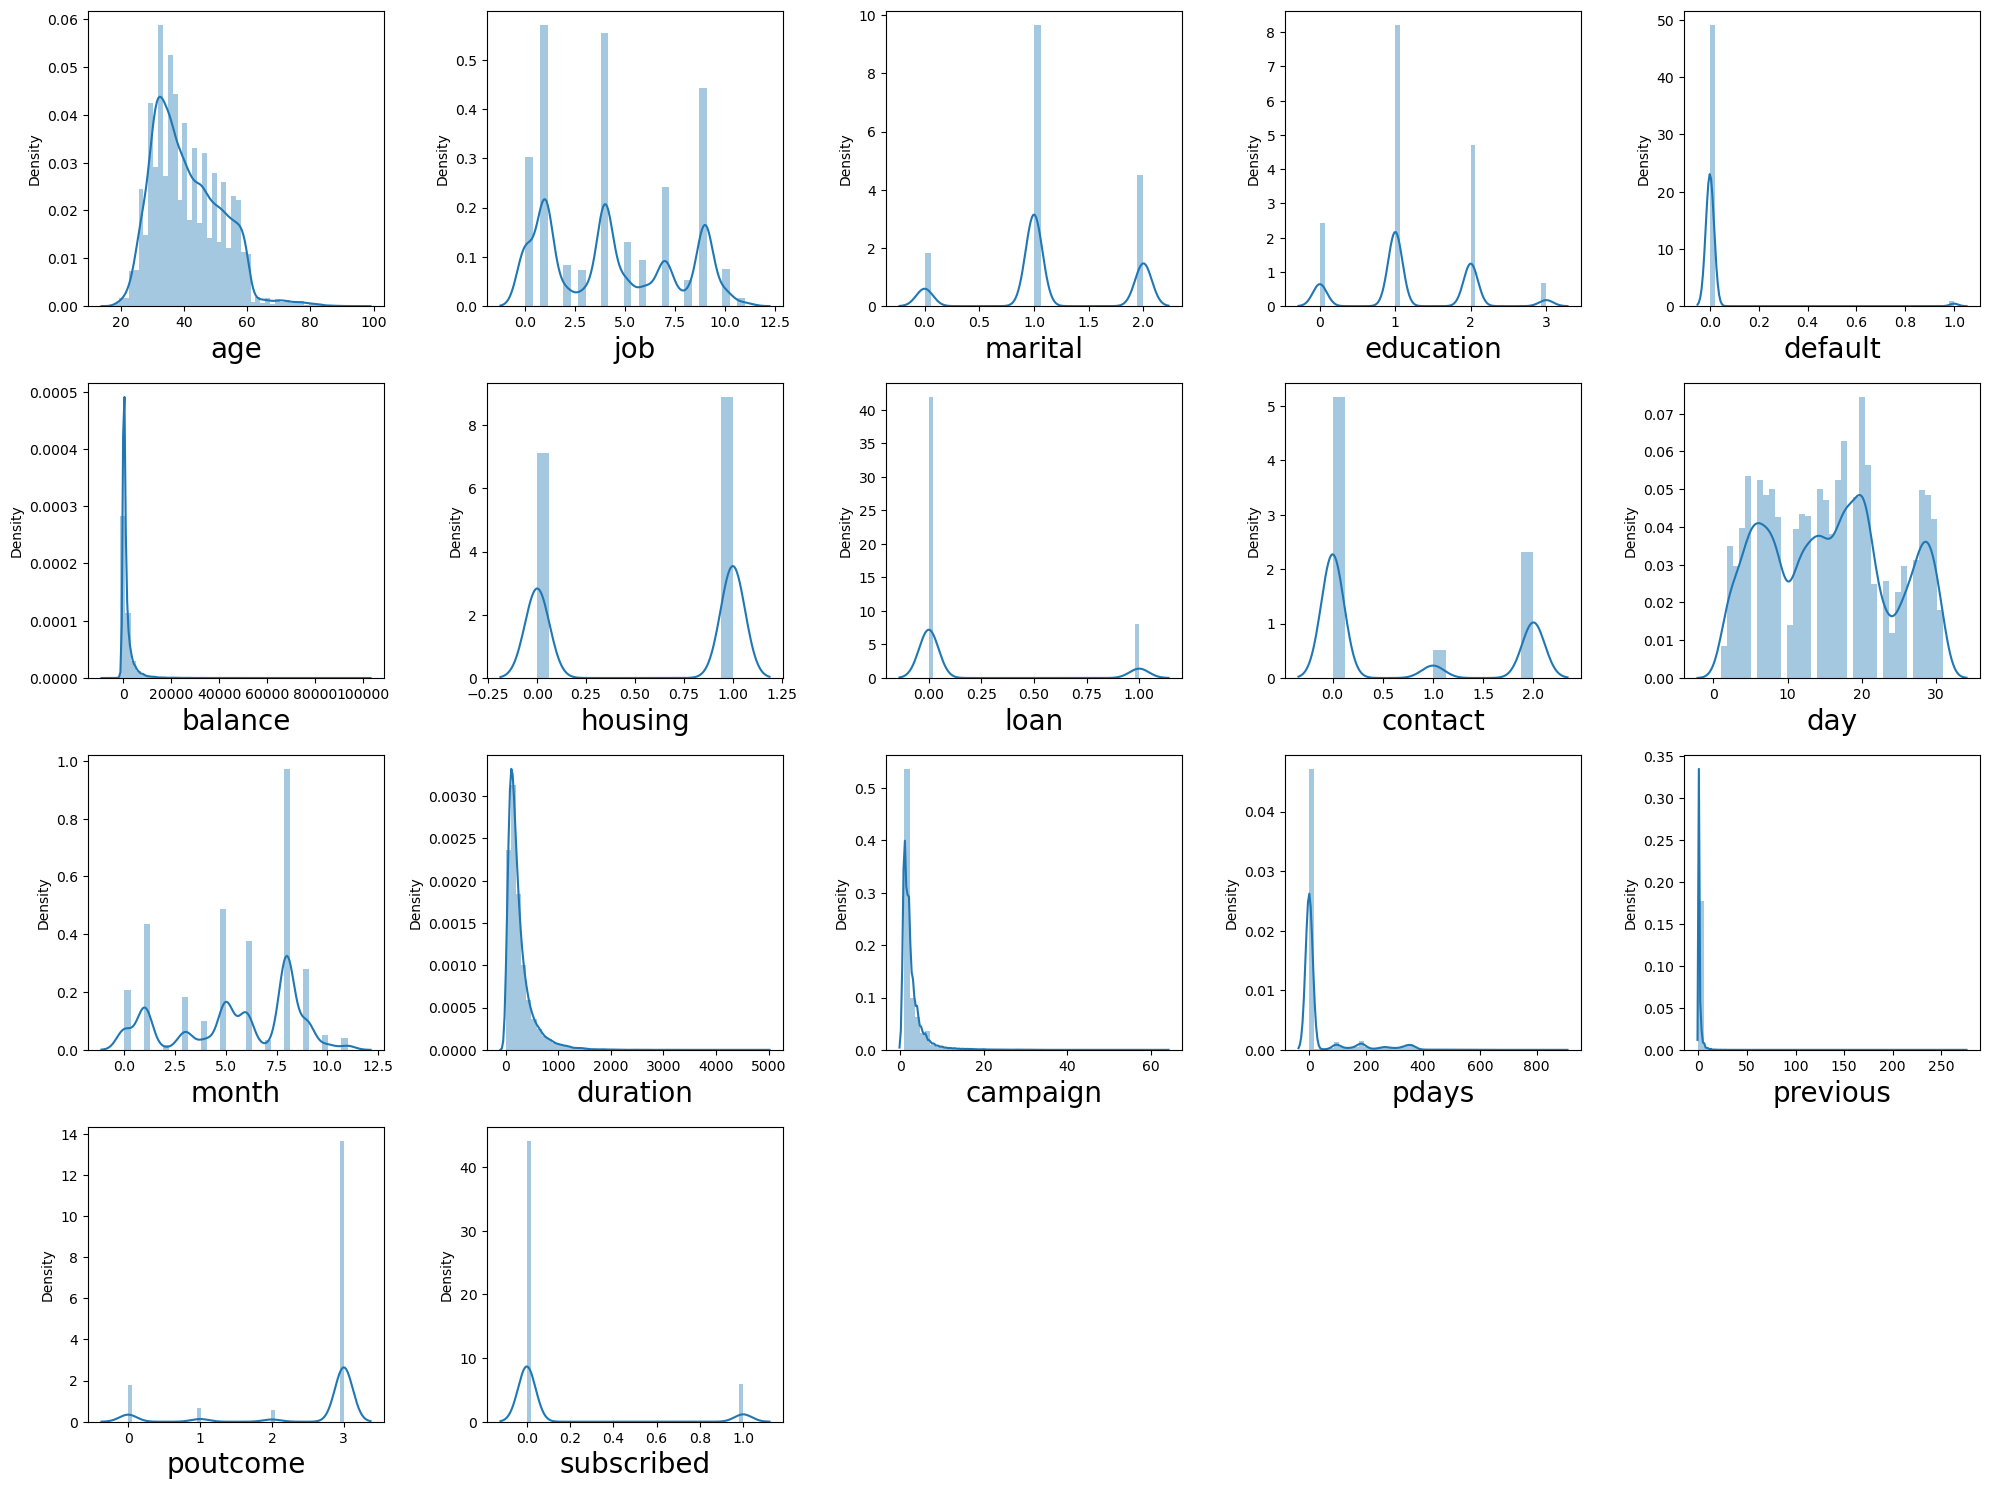

In [58]:
plt.figure(figsize=(20, 15), facecolor='white')
plot_number = 1  # Corrected variable name

for column in df[numerical_cols]:
    if plot_number <= 20:
        ax = plt.subplot(4, 5, plot_number)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plot_number += 1
    
plt.tight_layout()

In the above distribution plot we can see that our continous data columns have some skewness that will need to be treated and reduced  to cover up an 
acceptable range in data values.

In [59]:
import numpy as np
from scipy.stats import boxcox

positively_skewed_columns = ['default', 'balance', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']

for col in positively_skewed_columns:
    if (df[col] > 0).all():  # Check for zero or negative values
        df[col] = np.log1p(df[col])  # Use np.log1p to handle zero values

for col in positively_skewed_columns:
    if (df[col] > 0).all():  # Check for zero or negative values
        transformed_data, _ = boxcox(df[col])
        df[col] = transformed_data


In [60]:
negative_skew_columns = ['age', 'job', 'marital', 'education', 'housing', 'contact', 'day', 'month', 'poutcome']

In [61]:
for col in negative_skew_columns:
    if df[col].skew() < 0:  # Check for negative skewness
        df[col] = np.sqrt(df[col])

# Check skewness after transformation
skewness_after = df[negative_skew_columns].skew()

In [62]:
df[numerical_cols].skew()

age            0.681607
job            0.264817
marital       -1.453089
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -1.169481
duration       3.199766
campaign       0.111776
pdays          2.642374
previous      49.302348
poutcome      -2.264295
subscribed     2.377445
dtype: float64

In [63]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1.000000,3,0,1933,0.0,0,1,19,3.000000,44,0.091193,-1,0,1.732051,0
1,31,11,1.000000,1,0,3,0.0,0,0,20,2.236068,91,0.091193,-1,0,1.732051,0
2,27,7,1.000000,1,0,891,1.0,0,0,18,2.236068,240,-0.414558,-1,0,1.732051,0
3,57,4,0.000000,2,0,3287,0.0,0,0,22,2.449490,867,-0.414558,84,3,1.414214,1
4,31,9,1.000000,1,0,119,1.0,0,0,4,1.732051,380,-0.414558,-1,0,1.732051,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,1.414214,2,0,0,1.0,0,0,12,2.828427,116,0.091193,-1,0,1.732051,0
31643,53,4,0.000000,2,0,380,0.0,1,0,5,2.449490,438,0.091193,-1,0,1.732051,1
31644,32,4,1.414214,2,0,312,0.0,0,0,7,1.000000,37,0.293876,-1,0,1.732051,0
31645,57,9,1.000000,1,0,225,1.0,0,1,15,2.828427,22,0.580794,337,12,0.000000,0


In [94]:
df.isnull().sum()

ID               0
age              0
job              0
marital          0
education        0
default          0
balance       2630
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
subscribed       0
dtype: int64

In [64]:
df['balance'].fillna(0, inplace=True)

In [65]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>,
        <Axes: title={'center': 'loan'}>],
       [<Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'poutcome'}>],
       [<Axes: title={'center': 'subscribed'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

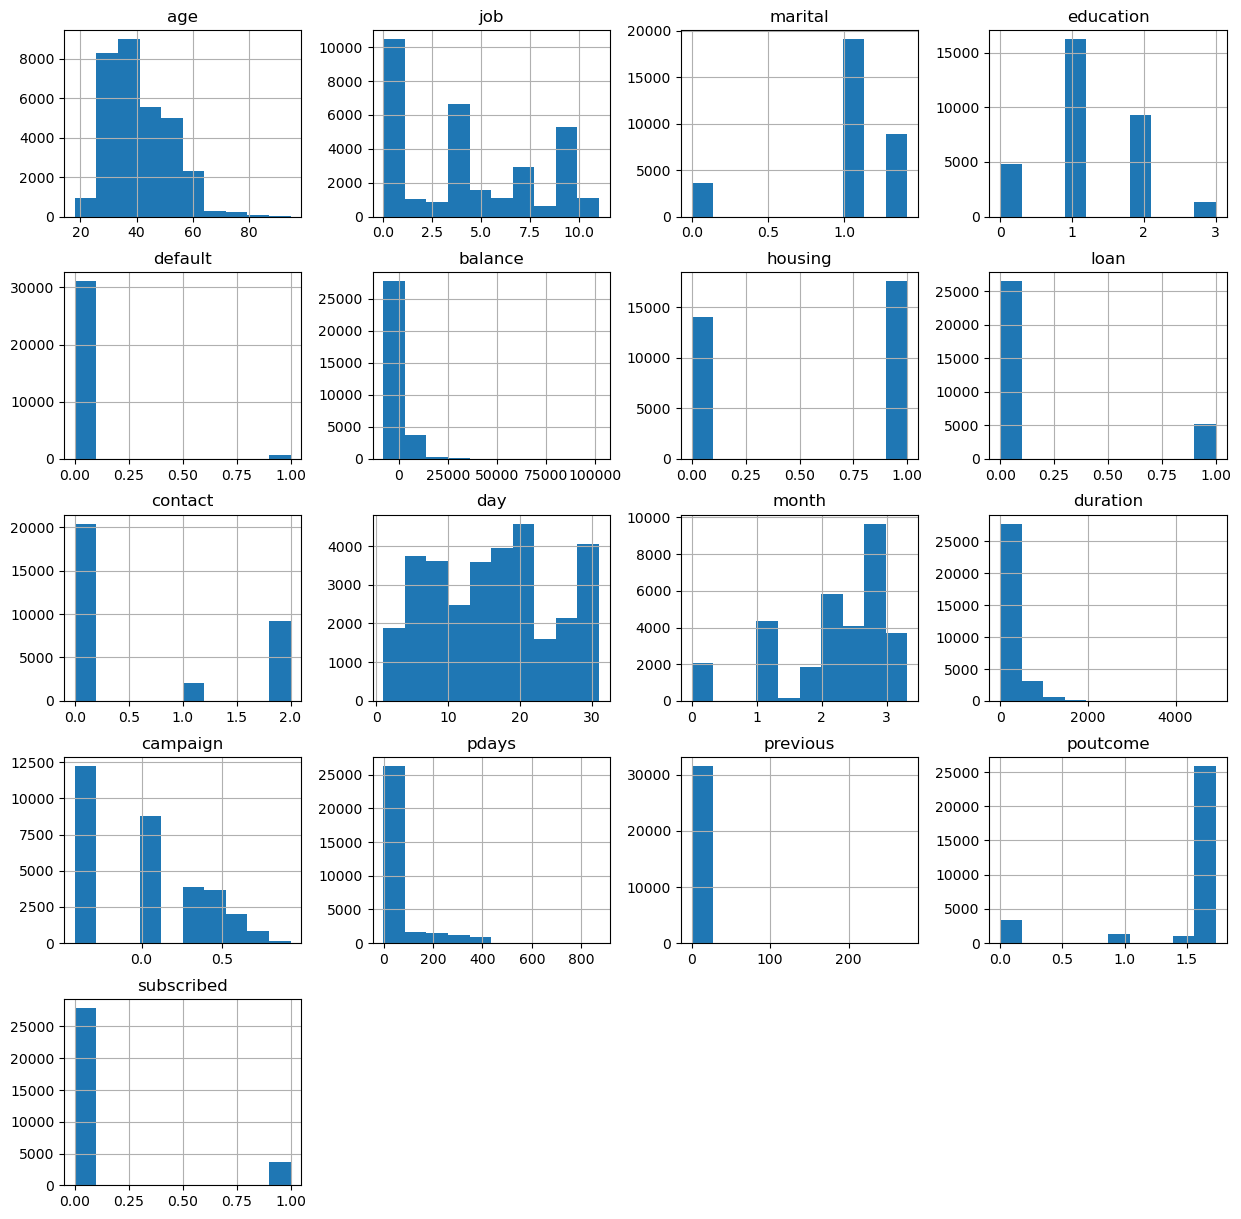

In [66]:
df.hist(figsize=(15,15))

In [67]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.330992,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.029140,-0.003870,0.023676,-0.021947,0.005761,0.006832,0.024538
job,-0.020765,1.000000,0.037421,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.075635,0.002694,0.008200,-0.022552,-0.003032,0.008647,0.038921
marital,-0.330992,0.037421,1.000000,0.068682,-0.015127,0.010506,-0.012873,-0.030477,-0.029812,-0.006064,-0.019031,0.003610,-0.011199,0.009937,0.008745,-0.010457,0.025987
education,-0.102356,0.170347,0.068682,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.053056,0.003842,-0.008019,-0.001566,0.015280,-0.014891,0.066051
default,-0.016117,-0.005217,-0.015127,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.013576,-0.010849,0.015275,-0.029622,-0.015877,0.032799,-0.020168
balance,0.103245,0.020638,0.010506,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.010209,0.024274,-0.016500,0.001789,0.013843,-0.016661,0.050807
housing,-0.183775,-0.125347,-0.012873,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.216535,0.003021,-0.037934,0.118790,0.034231,-0.099659,-0.141092
loan,-0.012657,-0.039049,-0.030477,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.040007,-0.012781,0.003581,-0.020078,-0.009258,0.005279,-0.072266
contact,0.026733,-0.078253,-0.029812,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.366319,-0.016503,0.003612,-0.245076,-0.141098,0.256400,-0.150051
day,-0.011056,0.020951,-0.006064,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.016271,-0.032288,0.141258,-0.087626,-0.048752,0.074443,-0.029600


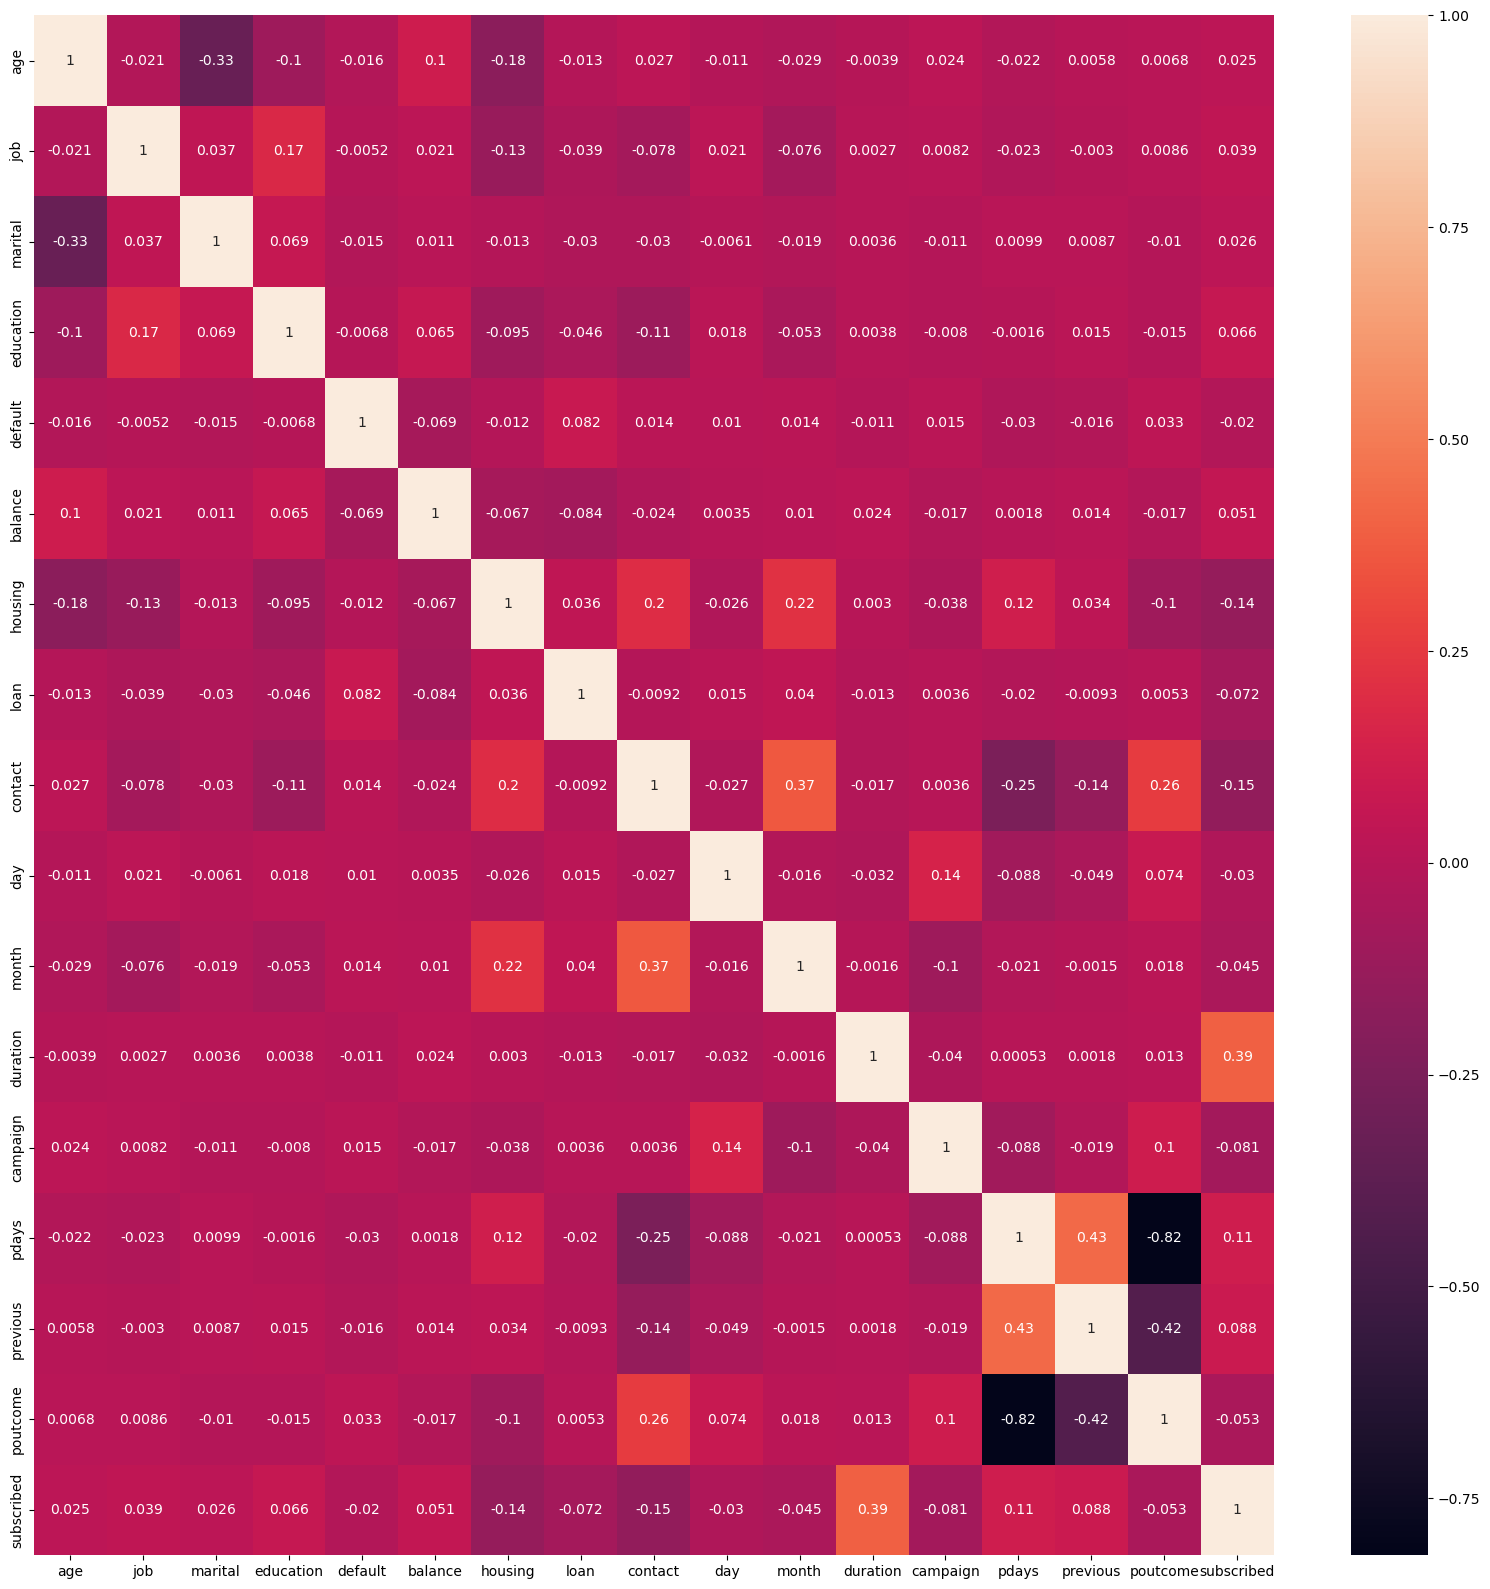

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Positive Correlation:- A correlation of +1 indicates a perfect positive correlation meaning that both variables move in the same direction together
Negative Correlation:- A Correlation of -1 indicates a perfect negative correlation meaning that as one variable goes up, the other goes down

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns. 

In [ ]:
# Correlation Bar Plot Comparing features with our lable

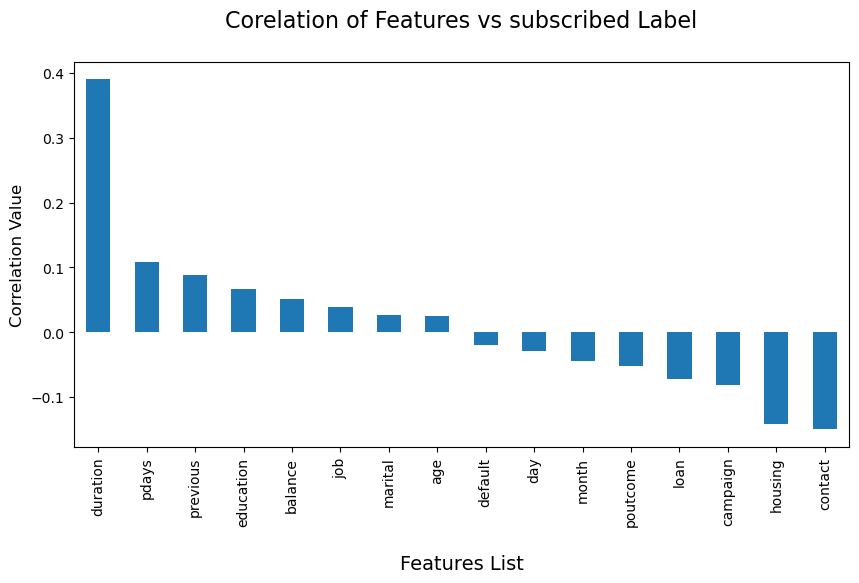

In [69]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['subscribed'].sort_values(ascending=False).drop('subscribed').plot.bar()
plt.title("Corelation of Features vs subscribed Label\n", fontsize=16)
plt.xlabel("\nFeatures List",fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [70]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1.000000,3,0,1933,0.0,0,1,19,3.000000,44,0.091193,-1,0,1.732051,0
1,31,11,1.000000,1,0,3,0.0,0,0,20,2.236068,91,0.091193,-1,0,1.732051,0
2,27,7,1.000000,1,0,891,1.0,0,0,18,2.236068,240,-0.414558,-1,0,1.732051,0
3,57,4,0.000000,2,0,3287,0.0,0,0,22,2.449490,867,-0.414558,84,3,1.414214,1
4,31,9,1.000000,1,0,119,1.0,0,0,4,1.732051,380,-0.414558,-1,0,1.732051,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,1.414214,2,0,0,1.0,0,0,12,2.828427,116,0.091193,-1,0,1.732051,0
31643,53,4,0.000000,2,0,380,0.0,1,0,5,2.449490,438,0.091193,-1,0,1.732051,1
31644,32,4,1.414214,2,0,312,0.0,0,0,7,1.000000,37,0.293876,-1,0,1.732051,0
31645,57,9,1.000000,1,0,225,1.0,0,1,15,2.828427,22,0.580794,337,12,0.000000,0


df.drop(columns=['ID'], inplace=True)

Splitting the data set into 2 vaiables namely x & y for feture & label 

In [73]:
x = df.drop('subscribed',axis=1)

x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1.000000,3,0,1933,0.0,0,1,19,3.000000,44,0.091193,-1,0,1.732051
1,31,11,1.000000,1,0,3,0.0,0,0,20,2.236068,91,0.091193,-1,0,1.732051
2,27,7,1.000000,1,0,891,1.0,0,0,18,2.236068,240,-0.414558,-1,0,1.732051
3,57,4,0.000000,2,0,3287,0.0,0,0,22,2.449490,867,-0.414558,84,3,1.414214
4,31,9,1.000000,1,0,119,1.0,0,0,4,1.732051,380,-0.414558,-1,0,1.732051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,1.414214,2,0,0,1.0,0,0,12,2.828427,116,0.091193,-1,0,1.732051
31643,53,4,0.000000,2,0,380,0.0,1,0,5,2.449490,438,0.091193,-1,0,1.732051
31644,32,4,1.414214,2,0,312,0.0,0,0,7,1.000000,37,0.293876,-1,0,1.732051
31645,57,9,1.000000,1,0,225,1.0,0,1,15,2.828427,22,0.580794,337,12,0.000000


In [74]:
y = df['subscribed']

y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int32

In [75]:
y.value_counts()

subscribed
0    27932
1     3715
Name: count, dtype: int64

In [ ]:
#Resolving the class imbalance issue  in our label column

In [76]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x,y = sm.fit_resample(x,y)

In [77]:
y.value_counts()

subscribed
0    27932
1    27932
Name: count, dtype: int64

After applying Over sampling we are once again listing the values of our label column to cross verify the updeted information Hence we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the ML model does not get biased towards one category

In [78]:
# Scaling & Feature

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.38291135, -1.43334744, -0.03575285, ..., -0.48507355,
        -0.3246099 ,  0.48257489],
       [-0.91772927,  2.2403934 , -0.03575285, ..., -0.48507355,
        -0.3246099 ,  0.48257489],
       [-1.28583176,  0.90448764, -0.03575285, ..., -0.48507355,
        -0.3246099 ,  0.48257489],
       ...,
       [-0.64165239,  0.23653476,  1.04671415, ...,  1.18650501,
         2.73938033, -1.90150791],
       [-1.19380614,  0.90448764,  0.8441047 , ..., -0.48507355,
        -0.3246099 ,  0.48257489],
       [-0.45760114,  1.23846408, -0.03575285, ..., -0.48507355,
        -0.3246099 ,  0.48257489]])

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, GridSearchCV


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()

maxAcc = 0
best_rs = 0

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    ac = accuracy_score(y_test, pred)
    
    if ac > maxAcc:
        maxAcc = ac
        best_rs = i

print('Best accuracy score:', maxAcc)
print('Random State:', best_rs)


Best accuracy score: 0.831734211656881
Random State: 476


In [81]:
# Let us split the data now at that random state
# Splitting the data into training and testing sets 80% training & 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=60)


In [82]:
# Print the size of x_train
print("Size of x_train:", x_train.shape)

# Print the size of x_test
print("Size of x_test:", x_test.shape)

# Print the size of y_train
print("Size of y_train:", y_train.shape)

# Print the size of y_test
print("Size of y_test:", y_test.shape)

Size of x_train: (50277, 16)
Size of x_test: (5587, 16)
Size of y_train: (50277,)
Size of y_test: (5587,)


# Machine Lerning Model for Classification with Evaluation Metrice

In [83]:
def classify(clf, x, y):
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=868)

    # Training the model
    clf.fit(x_train, y_train)

    # Predicting Y test
    pred = clf.predict(x_test)

    # Accuracy Score
    acc_score = accuracy_score(y_test, pred)
    print("Accuracy Score:", acc_score)

    # Confusion Matrix
    print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)

    # Cross Validation Score
    cv_scores = cross_val_score(clf, x, y, cv=5)
    cv_mean = cv_scores.mean()
    print("Cross Validation Score:", cv_mean)

    # Result of accuracy minus CV scores
    result = acc_score - cv_mean
    print("\nAccuracy Score minus Cross Validation Score is", result)

In [84]:
# Logestic Regression

clf = LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.8217290137819939
Confusion Matrix:
 [[2203  554]
 [ 442 2388]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      2757
           1       0.81      0.84      0.83      2830

    accuracy                           0.82      5587
   macro avg       0.82      0.82      0.82      5587
weighted avg       0.82      0.82      0.82      5587

Cross Validation Score: 0.8216204436241797

Accuracy Score minus Cross Validation Score is 0.00010857015781418067


In [85]:
# Dession TreeClassification

clf = DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.9203508143905494
Confusion Matrix:
 [[2503  254]
 [ 191 2639]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      2757
           1       0.91      0.93      0.92      2830

    accuracy                           0.92      5587
   macro avg       0.92      0.92      0.92      5587
weighted avg       0.92      0.92      0.92      5587

Cross Validation Score: 0.9068816365240883

Accuracy Score minus Cross Validation Score is 0.01346917786646118


In [86]:
# Random Forest Classifier

clf = RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.950957580096653
Confusion Matrix:
 [[2621  136]
 [ 138 2692]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2757
           1       0.95      0.95      0.95      2830

    accuracy                           0.95      5587
   macro avg       0.95      0.95      0.95      5587
weighted avg       0.95      0.95      0.95      5587

Cross Validation Score: 0.9307610855654307

Accuracy Score minus Cross Validation Score is 0.020196494531222298


In [87]:
# SVC

clf = SVC()
classify(clf,x,y)

Accuracy Score: 0.8960085913728297
Confusion Matrix:
 [[2406  351]
 [ 230 2600]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      2757
           1       0.88      0.92      0.90      2830

    accuracy                           0.90      5587
   macro avg       0.90      0.90      0.90      5587
weighted avg       0.90      0.90      0.90      5587

Cross Validation Score: 0.8893028975758621

Accuracy Score minus Cross Validation Score is 0.006705693796967616


In [88]:
# KNeighborsClassifier

clf = KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.9051369250044746
Confusion Matrix:
 [[2392  365]
 [ 165 2665]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      2757
           1       0.88      0.94      0.91      2830

    accuracy                           0.91      5587
   macro avg       0.91      0.90      0.90      5587
weighted avg       0.91      0.91      0.90      5587

Cross Validation Score: 0.900615970761441

Accuracy Score minus Cross Validation Score is 0.00452095424303367


In [89]:
# XGB

!pip install xgboost

import xgboost as xgb

clf = xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.9455879720780384
Confusion Matrix:
 [[2626  131]
 [ 173 2657]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2757
           1       0.95      0.94      0.95      2830

    accuracy                           0.95      5587
   macro avg       0.95      0.95      0.95      5587
weighted avg       0.95      0.95      0.95      5587

Cross Validation Score: 0.9153668716163963

Accuracy Score minus Cross Validation Score is 0.03022110046164206


In [90]:
# GradientBoostingClassifier

clf = GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.9310900304277788
Confusion Matrix:
 [[2582  175]
 [ 210 2620]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2757
           1       0.94      0.93      0.93      2830

    accuracy                           0.93      5587
   macro avg       0.93      0.93      0.93      5587
weighted avg       0.93      0.93      0.93      5587

Cross Validation Score: 0.9100144189346542

Accuracy Score minus Cross Validation Score is 0.021075611493124646


# Frome the above Evaluation Metrics, we can  clearly see that LogisticRegression is gioving best f1 score and least difference between accuracy score  & CV score so  selecting LogisticRegression and a our final model 

In [ ]:
dt = xgb.XGBClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Confussion Matrix: ",confusion_matrix(y_test,pred))
print("Classification Report: \n",classification_report(y_test,pred))

In [94]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions
pred = lr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.14879188207759445
R-squared Score: 0.4047252006026304


In [ ]:
# Hyper Parameter tuning on DecisionTreeClassifier

In [97]:

param_grid = {
    'fit_intercept': [True, False],
}

# Create a GridSearchCV object
grid = GridSearchCV(LinearRegression(), param_grid=param_grid, verbose=2, n_jobs=1)

# Fit the grid to the training data
grid.fit(x_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s


GridSearchCV(estimator=LinearRegression(), n_jobs=1,
             param_grid={'fit_intercept': [True, False]}, verbose=2)

In [98]:
print("Best Score:", grid.best_score_)
print("Best Estimator:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_)


Best Score: 0.4062225012487007
Best Estimator: LinearRegression()
Best Parameters: {'fit_intercept': True}


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Decision Tree Classifier
dt_final = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3, min_samples_split=10, random_state=487)

# Fit the classifier to the training data
dt_final.fit(x_train, y_train)

# Make predictions on the test data
pred_dt = dt_final.predict(x_test)

print('Accuracy:', accuracy_score(y_test, pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_dt))
print('Classification Report:\n', classification_report(y_test, pred_dt))


Accuracy: 0.922856631465903
Confusion Matrix:
 [[2635  196]
 [ 235 2521]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      2831
           1       0.93      0.91      0.92      2756

    accuracy                           0.92      5587
   macro avg       0.92      0.92      0.92      5587
weighted avg       0.92      0.92      0.92      5587



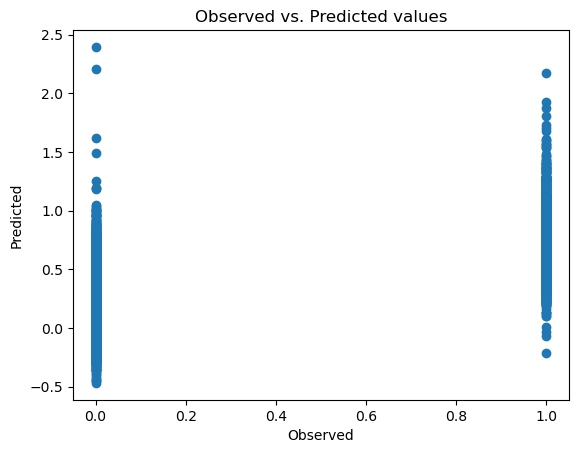

In [101]:
# AUC ROC Cureve are not for LinearRegression, So ploting Observed vs Predicted

# Predict the target values for the test data
y_pred = lr.predict(x_test)

# Plot observed vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs. Predicted values')
plt.show()


In [104]:
pred

array([0.51074984, 0.27513091, 0.05672233, ..., 0.13114623, 0.24230911,
       0.58815667])

In [105]:
print(len(pred))

5587


#Now Training part was done. so we have to focuse on the Test part

In [107]:
# Load the test dataset
df_test = pd.read_csv('termdeposit_test.csv')

In [108]:
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [117]:
print("The shape of dataset is :",df.shape)

df = df.drop_duplicates()
print(f"Rows & Columns after deleting the duiplicates :",df.shape)

The shape of dataset is : (31647, 17)
Rows & Columns after deleting the duiplicates : (31647, 17)


In [110]:
#Cheking columns
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [114]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [112]:
test_categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in test_categorical_cols:
    if df_test[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df_test[col]):
        df_test[col] = le.fit_transform(df_test[col])

df_test


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [119]:
df_test.drop('ID', axis=1, inplace=True)

In [120]:
# Standardize features
X_test_scaled = scaler.transform(df_test)

#Make Predictions using the Trained Model

In [122]:
# Make predictions on the test dataset using the trained model
y_pred_test = lr.predict(X_test_scaled)


# Save predictions for submission

In [124]:
submission_df = pd.DataFrame({'subscribed': y_pred_test})
submission_df.to_csv('submission_test.csv', index=False)


In [125]:
y_pred_test

array([-0.47260217,  0.5668539 ,  0.41604579, ...,  0.35016538,
        0.58400297,  0.54401111])

In [127]:
# Apply threshold of 0.5 to convert probability scores to binary predictions
y_pred_test_binary = (y_pred_test >= 0.5).astype(int)

# Save binary predictions for submission
submission_df = pd.DataFrame({'subscribed': y_pred_test_binary})
submission_df.to_csv('submission_test.csv', index=False)


In [128]:
print(len(y_pred_test))

13564


In [129]:
y_pred_test_binary

array([0, 1, 0, ..., 0, 1, 1])